In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, Adamax

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [57]:
carregando_clear = np.load('D:\\Dados capturados\\DATASETS\\CLEAR.npy', mmap_mode='r')
dados_clear = carregando_clear[:700000]

carregamento_lte1m = np.load('D:\\Dados capturados\\DATASETS\\LTE_1M.npy', mmap_mode='r')
dados_lte1m = carregamento_lte1m[:700000]

dados_wifi = np.load('D:\\Dados capturados\\DATASETS\\WIFI.npy', mmap_mode='r')
dados_wifi = dados_wifi[:700000]

In [58]:
def sep_col_comp(dados):
    parte_real = dados.real
    parte_imag = dados.imag
    return parte_real , parte_imag

def montagem_datasets(dados_1 , dados_2):
    real1 , imag1 = sep_col_comp(dados_1)
    real2 , imag2 = sep_col_comp(dados_2)
    atrib1 = np.zeros(len(dados_1))
    atrib2 = np.ones(len(dados_2))
    dados1 = np.column_stack((real1,imag1,atrib1))
    dados2 = np.column_stack((real2,imag2,atrib2))
    conjunto = np.vstack([dados1 , dados2])
    indices = np.random.permutation(len(conjunto))
    dados = conjunto[indices]
    return dados

def remodel(dados , feature):
    df = pd.DataFrame(dados , columns = ['real' , 'imag' , 'clfq'])
    df_junt = df[['real' , 'imag']].to_numpy()
    dados_dim = df_junt
    dados_dim = dados_dim.astype(np.float32)
    alvo = df['clfq'].values
    alvo_dim = alvo
    alvo_dim = alvo_dim.astype(np.float32)
    
    return dados_dim , alvo_dim

def processos(dados_1 , dados_2 , feature):
    dados = montagem_datasets(dados_1 , dados_2)
    X , Y = remodel(dados , feature)
    return X , Y

### CLEAR X LTE

#### CARREGAMENTO DOS DADOS:

In [59]:
X,Y = processos(dados_clear, dados_lte1m ,2)

print(X)
print(Y)

[[-6.1037244e-05  6.1037244e-05]
 [-3.0518622e-05 -6.1037244e-05]
 [ 9.1555863e-05  1.8311173e-04]
 ...
 [ 1.8311173e-04 -6.1037244e-05]
 [-1.2207449e-04  9.1555863e-05]
 [ 6.1037244e-05 -9.1555863e-05]]
[0. 0. 0. ... 1. 1. 1.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [67]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size=0.8)

#### NORMALIZACAO DOS DADOS:

In [68]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

#### TREINAMENTO DO MODELO:

In [69]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(300,200,30),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, Y_train)

MLPClassifier(hidden_layer_sizes=(300, 200, 30), max_iter=500)

#### ACURACIA:

In [70]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.53


#### MATRIZ DE CONFUSAO:

In [71]:
cm = confusion_matrix(Y_test, y_pred, labels=mlp_clf.classes_)

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)

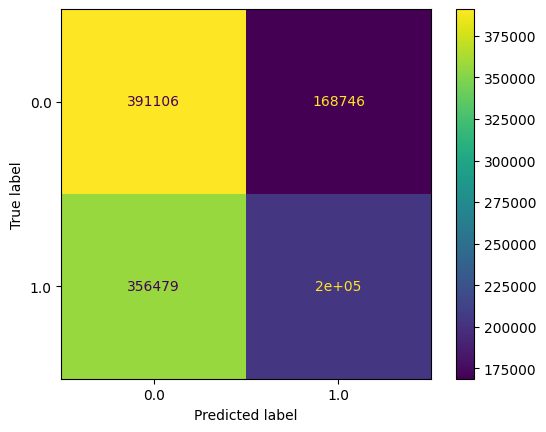

In [73]:
disp.plot()

### CLEAR X WIFI

#### CARREGAMENTO DOS DADOS:

In [74]:
X_2,Y_2 = processos(dados_clear, dados_wifi ,2)

print(X_2)
print(Y_2)

[[ 0.0000000e+00  6.1037244e-05]
 [ 3.0518622e-05 -1.2207449e-04]
 [-1.5259311e-04  2.1363035e-04]
 ...
 [-6.1037244e-05 -3.3570486e-04]
 [ 3.0518622e-05  3.6622345e-04]
 [-1.5259311e-04 -6.1037244e-05]]
[0. 1. 0. ... 1. 1. 0.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [75]:
X_2_train , X_2_test , Y_2_train , Y_2_test = train_test_split(X_2, Y_2, test_size=0.8)

#### NORMALIZACAO DOS DADOS:

In [77]:
sc_2=StandardScaler()

scaler_2 = sc_2.fit(X_2_train)
trainX_2_scaled = scaler.transform(X_2_train)
testX_2_scaled = scaler.transform(X_2_test)

#### TREINAMENTO DO MODELO:

In [78]:
mlp_clf_2 = MLPClassifier(hidden_layer_sizes=(300,200,30),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')

mlp_clf_2.fit(trainX_2_scaled, Y_2_train)

MLPClassifier(hidden_layer_sizes=(300, 200, 30), max_iter=500)

#### ACURACIA:

In [86]:
y_2_pred = mlp_clf_2.predict(testX_2_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_2_test, y_2_pred)))

Accuracy: 0.59


#### MATRIZ DE CONFUSAO:

In [96]:
cm_2 = confusion_matrix(Y_2_test, y_2_pred, labels=mlp_clf_2.classes_)

In [104]:
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=mlp_clf_2.classes_)

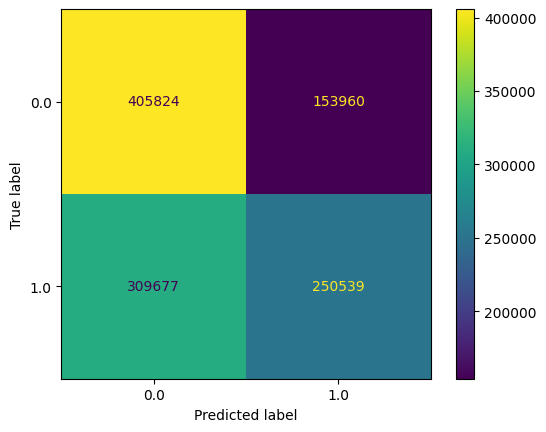

In [105]:
disp_2.plot()

### LTE X WIFI

#### CARREGAMENTO DOS DADOS:

In [90]:
X_3,Y_3 = processos(dados_lte1m, dados_wifi ,2)

print(X_3)
print(Y_3)

[[ 2.1363035e-04  0.0000000e+00]
 [-3.0518623e-04  9.1555863e-05]
 [ 1.2207449e-04 -6.1037244e-05]
 ...
 [ 6.1037244e-05 -3.0518622e-05]
 [-2.7466760e-04  3.3570486e-04]
 [ 0.0000000e+00  2.7466760e-04]]
[0. 0. 0. ... 0. 1. 1.]


#### CONJUNTOS DE TREINAMENTO E TESTE:

In [91]:
X_3_train , X_3_test , Y_3_train , Y_3_test = train_test_split(X_3, Y_3, test_size=0.8)

#### NORMALIZACAO DOS DADOS:

In [92]:
sc_3=StandardScaler()

scaler_3= sc_2.fit(X_3_train)
trainX_3_scaled = scaler.transform(X_3_train)
testX_3_scaled = scaler.transform(X_3_test)

#### TREINAMENTO DO MODELO:

In [94]:
mlp_clf_3 = MLPClassifier(hidden_layer_sizes=(300,200,30),
                        max_iter = 500,activation = 'relu',
                        solver = 'adam')

mlp_clf_3.fit(trainX_3_scaled, Y_3_train)

MLPClassifier(hidden_layer_sizes=(300, 200, 30), max_iter=500)

#### ACURACIA:

In [95]:
y_3_pred = mlp_clf_3.predict(testX_3_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_3_test, y_3_pred)))

Accuracy: 0.56


#### MATRIZ DE CONFUSAO:

In [99]:
cm_3 = confusion_matrix(Y_3_test, y_3_pred, labels=mlp_clf_3.classes_)

In [102]:
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=mlp_clf_3.classes_)

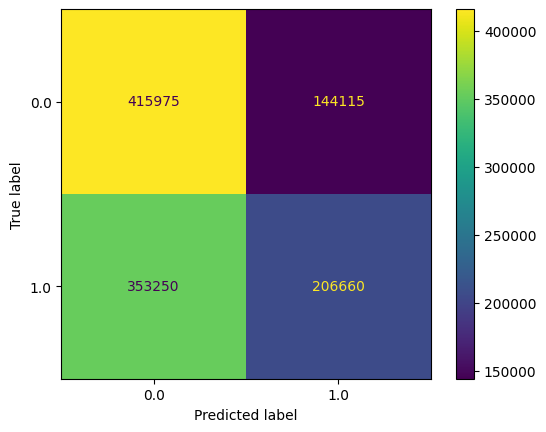

In [103]:
disp_3.plot()